In [36]:
import pandas as pd
df = pd.read_csv(r"C:\Users\099812\Desktop\demo-azure data studio\data\T_Dim_Produit.csv",sep=",")
df.head()

,Produit_PK,Produit_ID,EntiteRattachement_FID,BrancheAssurance_FID,Produit_CODE,LibelleCourt_NOM,LibelleLong_NOM,FamilleProduit_NOM,StatutProduit_NOM,TypeOffre_NOM,TNS_FLAG,LoiEvin_FLAG,Produit_DATECRE,Produit_DATEMOD,Produit_DEBUTVAL,Produit_FINVAL
0,1,aRKfV0000RN8n,qjmjF0000RH07,d,PC_EDENAU_3,EDEN AUTO 3,Contrat particulier,collectif,validé,SUR-MESURE,Non,Non,2023-03-27,2023-03-27,2023-03-27,9999-12-31
1,4,aRKfV0000ROs1,qjmjF0000RH07,e,SC_AMOLLINE,AMOLLINE COLL,Contrat particulier,collectif,validé,SUR-MESURE,Non,Non,2023-03-27,2023-03-27,2023-03-27,9999-12-31
2,5,aRKfV0000RJ8R,qjmjF0000RH07,d,PC_KERTRUCK,KERTRUCKS,Contrat particulier,collectif,validé,SUR-MESURE,Non,Non,2023-03-27,2023-03-27,2023-03-27,9999-12-31
3,6,aRKfV0000RJBc,qjmjF0000RH07,e,SC_EMOTORS,E-MOTORS COLL,Contrat particulier,collectif,validé,SUR-MESURE,Non,Non,2023-03-27,2023-03-27,2023-03-27,9999-12-31
4,7,aRKfV0000RJ8Q,qjmjF0000RH07,d,PC_GUEUDE_1,GUEUDET 1 GROUPE,Contrat particulier,collectif,validé,SUR-MESURE,Non,Non,2023-03-27,2023-03-27,2023-03-27,9999-12-31


In [47]:
print("N rows, N columns :",df.shape)

N rows, N columns : (837, 16)


In [48]:
#Nombre de code produit par type d'offre
#SELECT TypeOffre_NOM, count(Produit_CODE) as Nombre_des_codes_de_produits   FROM dbo.T_Dim_Produit where FamilleProduit_NOM in ('collectif','individuel')
#group by TypeOffre_NOM ;

df2 = df[(df["FamilleProduit_NOM"]== 'collectif') | (df["FamilleProduit_NOM"]=='individuel')]
df2 = df2[["Produit_CODE","TypeOffre_NOM"]]
df2.head()

,Produit_CODE,TypeOffre_NOM
0,PC_EDENAU_3,SUR-MESURE
1,SC_AMOLLINE,SUR-MESURE
2,PC_KERTRUCK,SUR-MESURE
3,SC_EMOTORS,SUR-MESURE
4,PC_GUEUDE_1,SUR-MESURE


In [49]:
result = df2.groupby("TypeOffre_NOM")["Produit_CODE"].count()
result.head()

TypeOffre_NOM
CONVENTIONNEL      7
STANDARD         246
SUR-MESURE       583
Name: Produit_CODE, dtype: int64

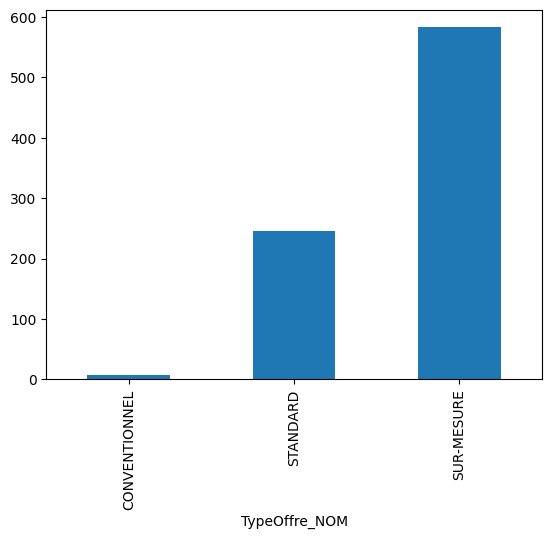

<Axes: xlabel='TypeOffre_NOM'>

In [50]:
import matplotlib.pyplot as plt
result.plot(kind="bar")